In [1]:
from crm.two_piece_envelope import *
from crm.levy_rejection import *
from crm.levy_processes import *
from crm.crm_approx import *
from crm.utils.levy_process_utils import *
from crm.utils.general_utils import measure_time_process, measure_time_rej_methods

plt.style.use("bmh")

# Beta Process speed test

In [8]:
num_fits = 10000
ms = [1, 2, 3, 5, 7, 10]
cs = [2, 3, 20]
size = 100
my_time = {}
fk_time = {}
rej_time = {}
two_env_time = {}

In [9]:
for m in ms:
    my_time[m] = {}
    fk_time[m] = {}
    rej_time[m] = {}
    two_env_time[m] = {}
    for c in cs:
        fk_time[m][c] =  measure_time_process(ferguson_klass, int(num_fits/10), beta_process(m ,c), size=100)
        my_time[m][c] = measure_time_approx_process(num_fits, beta_process(m ,c), 1001, g_beta_process(m ,c), -1, size=100, thr=0.5, bounds=(1e-10, 1))
        rej_time[m][c] = measure_time_rej_methods(rejection_beta_brod, num_fits, m, c, size=100)
        two_env_time[m][c] = measure_time_rej_methods(two_envelope_beta, num_fits, m, c, size=100)

100%|██████████| 10000/10000 [00:00<00:00, 56345.29it/s]


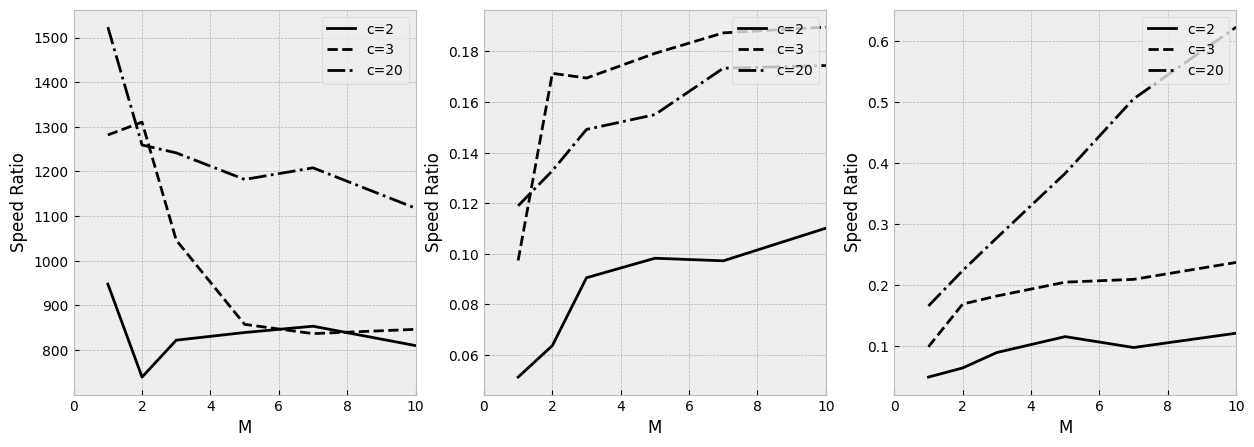

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ls = ['-', '--', '-.']
for i, c in enumerate(cs):
    mt = np.asarray([my_time[m][c] for m in ms])
    axs[0].plot(ms, np.asarray([fk_time[m][c] for m in ms]) / mt, label=f'c={c}', ls=ls[i], c="black")
    axs[2].plot(ms, np.asarray([rej_time[m][c] for m in ms]) / mt, label=f'c={c}', ls=ls[i], c="black")
    axs[1].plot(ms, np.asarray([two_env_time[m][c] for m in ms]) / mt, label=f'c={c}', ls=ls[i], c="black")
for ax in axs:
    ax.set_xlabel("M")
    ax.set_xlim(0, 10)
    ax.set_ylabel("Speed Ratio")
    ax.legend(loc=1)
fig.savefig("beta_process_speed_test.pdf", bbox_inches="tight")

# Stable Beta Process speed test

In [12]:
num_fits = 10000
ms = [1, 2, 3, 5, 7, 10]
cs = [2, 3, 20]
sigmas = [0.1, 0.3, 0.9]
size = 100
my_time = {}
fk_time = {}
rej_time = {}
two_env_time = {}

In [13]:
for m in ms:
    my_time[m] = {}
    fk_time[m] = {}
    rej_time[m] = {}
    two_env_time[m] = {}
    for c in cs:
        my_time[m][c] = {}
        fk_time[m][c] = {}
        rej_time[m][c] = {}
        two_env_time[m][c] = {}
        for sigma in sigmas:
            fk_time[m][c][sigma] =  measure_time_process(ferguson_klass, int(num_fits/10), stable_beta_process(m ,c, sigma), size=size)
            my_time[m][c][sigma] = measure_time_approx_process(num_fits, stable_beta_process(m ,c, sigma), 1001, g_stable_beta_process(m ,c, sigma), -1-sigma, size=100, thr=0.5, bounds=(1e-10, 1))
            rej_time[m][c][sigma] = measure_time_rej_methods(rejection_stable_beta_brod, num_fits, m, c, sigma, size=size)
            two_env_time[m][c][sigma] = measure_time_rej_methods(two_envelope_stable_beta, num_fits, m, c, sigma, size=size)

  0%|          | 0/1000 [00:00<?, ?it/s]D:\dev\IBP\IBP\levy_processes.py:324: RuntimeWarning: overflow encountered in exp
  return const1 * np.exp(-sigma * x + (c + sigma - 1) * np.log(1 - np.exp(x)))
100%|██████████| 10000/10000 [00:00<00:00, 51952.07it/s]


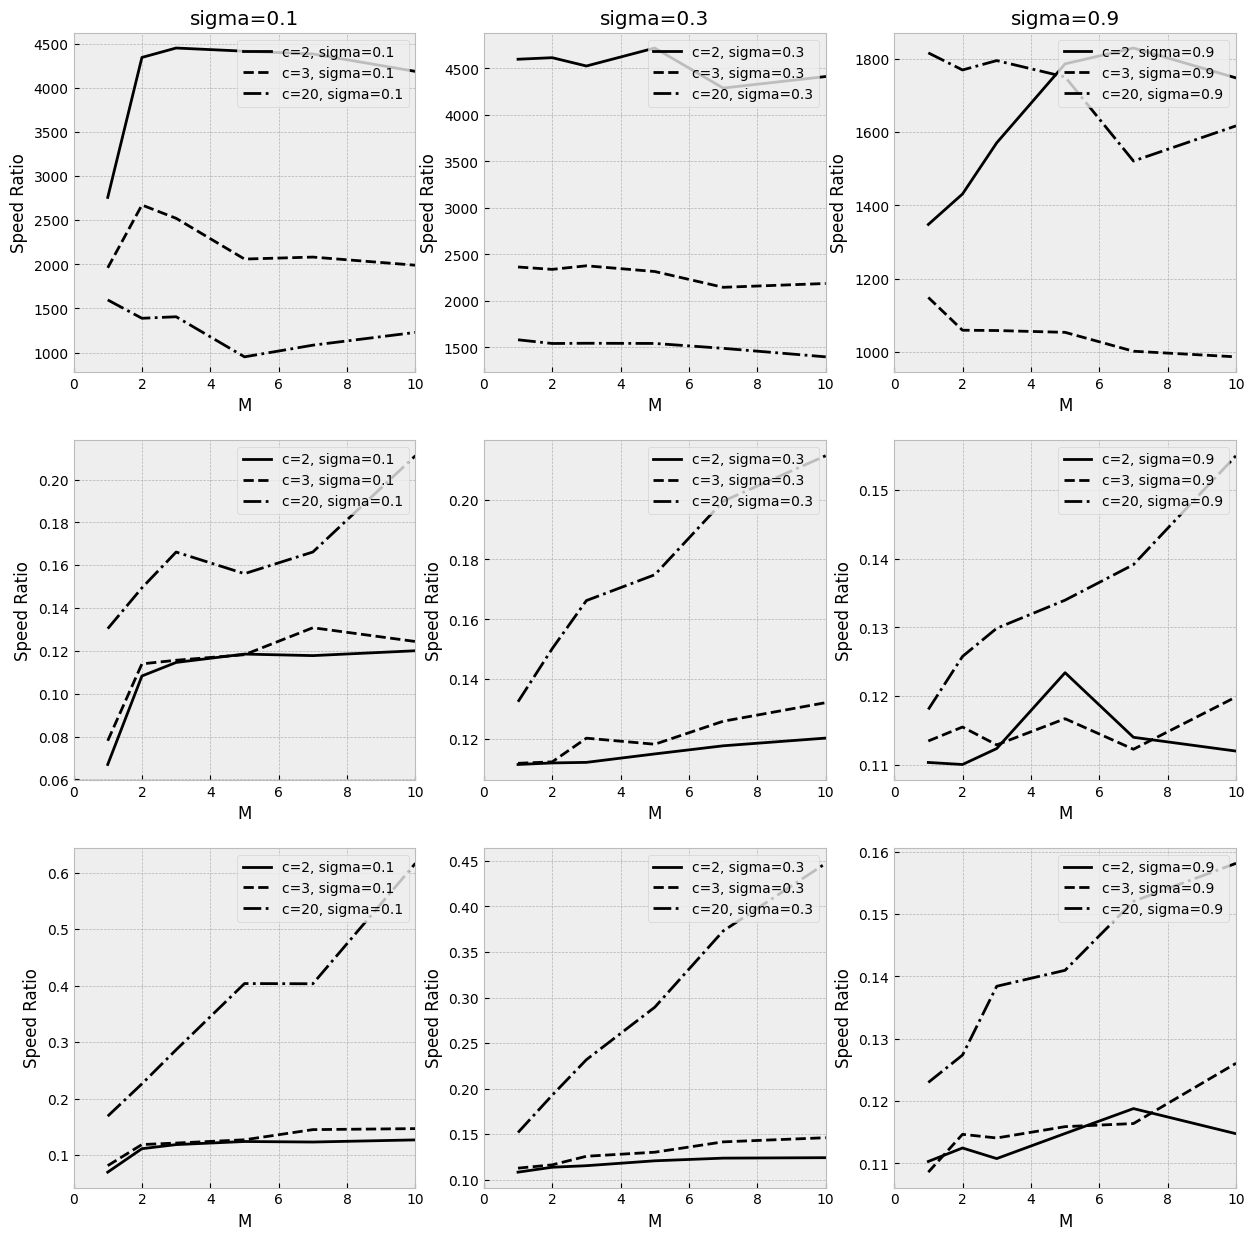

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
ls = ['-', '--', '-.']
for i, c in enumerate(cs):
    for j, sigma in enumerate(sigmas):
        mt = np.asarray([my_time[m][c][sigma] for m in ms])
        axs[0, j].plot(ms, np.asarray([fk_time[m][c][sigma] for m in ms]) / mt, label=f'c={c}, sigma={sigma}', ls=ls[i], c="black")
        axs[2, j].plot(ms, np.asarray([rej_time[m][c][sigma] for m in ms]) / mt, label=f'c={c}, sigma={sigma}', ls=ls[i], c="black")
        axs[1, j].plot(ms, np.asarray([two_env_time[m][c][sigma] for m in ms]) / mt, label=f'c={c}, sigma={sigma}', ls=ls[i], c="black")
 
for j, sigma in enumerate(sigmas):
    axs[0, j].set_title(f"sigma={sigma}")
        
for ax in axs.flatten():
    ax.set_xlabel("M")
    ax.set_xlim(0, 10)
    ax.set_ylabel("Speed Ratio")
    ax.legend(loc=1)
fig.savefig("stable_beta_process_speed_test.pdf", bbox_inches="tight")

# Gamma Process speed test

In [2]:
num_fits = 10000
ms = [1, 2, 3, 5, 7, 10]
size = 100
my_time = {}
fk_time = {}
rej_time = {}
two_env_time = {}

In [3]:
for m in ms:
    my_time[m] = {}
    fk_time[m] = {}
    rej_time[m] = {}
    two_env_time[m] = {}
    fk_time[m] =  measure_time_process(ferguson_klass, int(num_fits/10), gamma_process(m), size=size)
    my_time[m] = measure_time_approx_process(num_fits, gamma_process(m), 1001, g_gamma_process(m), -1, size=size, thr=0.5, bounds=(1e-10, np.inf))
    rej_time[m] = measure_time_rej_methods(rejection_gamma_ros, num_fits, m, size=size)
    two_env_time[m] = measure_time_rej_methods(two_envelope_gamma, num_fits, m, size=size)

100%|██████████| 10000/10000 [00:00<00:00, 141164.85it/s]


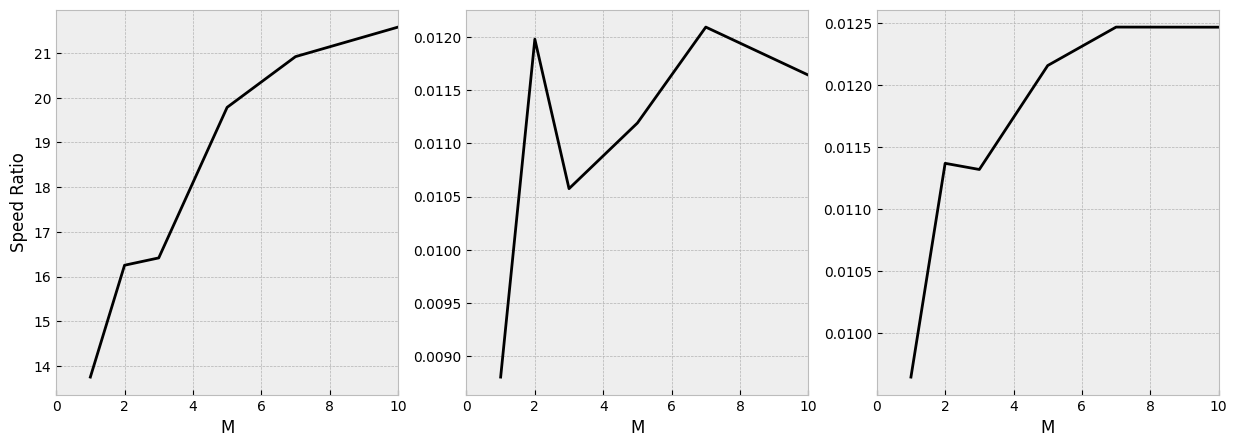

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ls = ['-', '--', '-.']
mt = np.asarray([my_time[m] for m in ms])
axs[0].plot(ms, np.asarray([fk_time[m] for m in ms]) / mt, ls=ls[0], c="black")
axs[2].plot(ms, np.asarray([rej_time[m] for m in ms]) / mt, ls=ls[0], c="black")
axs[1].plot(ms, np.asarray([two_env_time[m] for m in ms]) / mt, ls=ls[0], c="black")
    
for ax in axs:
    ax.set_xlabel("M")
    ax.set_xlim(0, 10)
axs[0].set_ylabel("Speed Ratio")
    # ax.legend(loc=1)
fig.savefig("gamma_process_speed_test.pdf", bbox_inches="tight")

# Generalized Gamma Process speed test

In [17]:
num_fits = 1000
ms = [1, 2, 3, 5, 7, 10]
sigmas = [0.1, 0.3, 0.9]
size = 100
my_time = {}
fk_time = {}
rej_time = {}
two_env_time = {}

In [18]:
for m in ms:
    my_time[m] = {}
    fk_time[m] = {}
    rej_time[m] = {}
    two_env_time[m] = {}
    for sigma in sigmas:
        fk_time[m][sigma] =  measure_time_process(ferguson_klass, int(num_fits/10), generalized_gamma_process(m, sigma, 1), size=size)
        my_time[m][sigma] = measure_time_approx_process(num_fits, generalized_gamma_process(m, sigma, 1), 1001, g_generalized_gamma_process(m, sigma, 1), -1-sigma, size=size, thr=0.5, bounds=(1e-10, np.inf))
        rej_time[m][sigma] = measure_time_rej_methods(rejection_gen_gamma_brod, num_fits, m, sigma, size=size)
        two_env_time[m][sigma] = measure_time_rej_methods(two_envelope_gen_gamma, num_fits, m, sigma, size=size)

100%|██████████| 1000/1000 [00:00<00:00, 83458.77it/s]


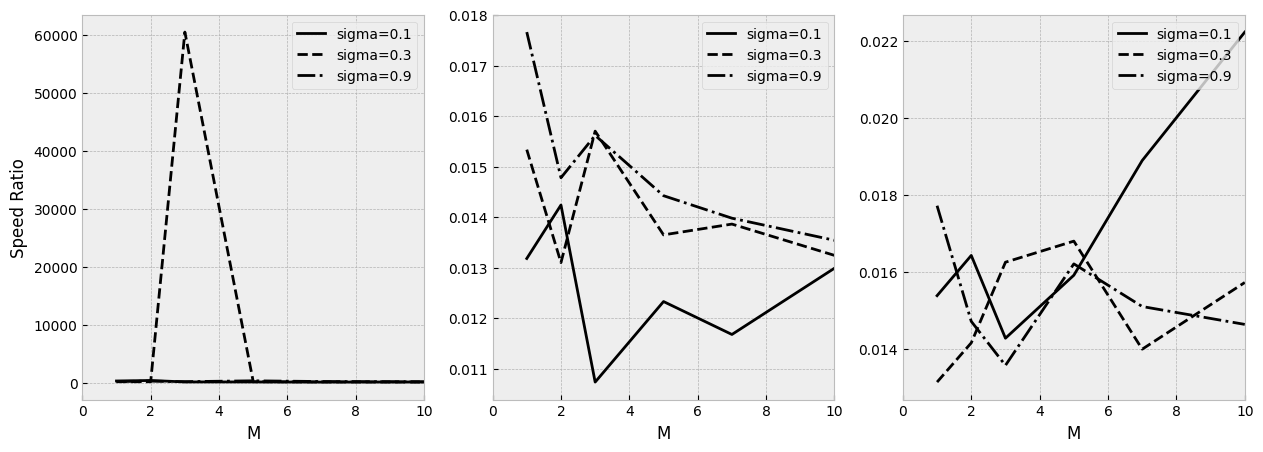

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ls = ['-', '--', '-.']
for i, sigma in enumerate(sigmas):
    mt = np.asarray([my_time[m][sigma] for m in ms])
    axs[0].plot(ms, np.asarray([fk_time[m][sigma] for m in ms]) / mt, label=f'sigma={sigma}', ls=ls[i], c="black")
    axs[2].plot(ms, np.asarray([rej_time[m][sigma] for m in ms]) / mt, label=f'sigma={sigma}', ls=ls[i], c="black")
    axs[1].plot(ms, np.asarray([two_env_time[m][sigma] for m in ms]) / mt, label=f'sigma={sigma}', ls=ls[i], c="black")

axs[0].set_ylabel("Speed Ratio")
for ax in axs:
    ax.set_xlabel("M")
    ax.set_xlim(0, 10)
    ax.legend(loc=1)
    
fig.savefig("generalized_gamma_process_speed_test.pdf", bbox_inches="tight")